# KNN Algorithm with Scikit-Learn

The Dataset will be this of the famous iris data set that consist of four attributes: 
    * sepal-width, 
    * sepal-length, 
    * petal-width and 
    * petal-length.
The objective is to predict the class to which these plants belong.
There are three classes in the dataset:
    * Iris-setosa,
    * Iris-versicolor and 
    * Iris-virginica.

![](https://media.fondation-plainedesmaures-environnement.fr/2015/07/iris-nain_legende-322x399.png)

![](https://www.jardindupicvert.com/17763-large_default/iris-de-l-alaska.jpg) $$Iris setosa$$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/320px-Iris_versicolor_3.jpg)  $$Iris  Versicolor$$

![](https://cdn.lilieswatergardens.co.uk/images/prod_images/1451659412-iris-versicolor-mysterious-monique-5c.jpg) $$Iris Versicolor$$

![](https://bugwoodcloud.org/images/768x512/1391037.jpg) $$Iris Virginica$$

In [83]:
from IPython.display import Latex

### K-Nearest Neighbors

kNN is a non-parametric learning algorithm that keeps all training examples in memory.

Andriy Burkov "The Hundred-Page Machine Learning book"

Andreas Muller "Le Machine learning avec Python"

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### Importing the Dataset

In [48]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [49]:
print("Keys of iris_dataset: {}". format(iris_dataset.keys()))

Keys of iris_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [50]:
print(iris_dataset['DESCR'][:193] +"\n...)")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...)


The names of the classes are stored in the attribute "target_names":

In [51]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [52]:
print("Feature names: {}".format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [53]:
#data: mémorise les mesures de la longueur et la largeur du pétale comme du sépale dans un tableau NumPy
print("Type of data: {}". format(type(iris_dataset['data'])))


Type of data: <class 'numpy.ndarray'>


In [54]:
#we have a table with measures of 150 different flowers
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [55]:
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [56]:
print("Type of target: {}".format(type(iris_dataset['target'])))


Type of target: <class 'numpy.ndarray'>


The information about the class of each sample is stored in the target attribute of the dataset:

In [57]:
#le tableau target ne posede qu'une seule dimension, avec une entrée par fleur:

print("Shape of target: {}".format(iris_dataset['target'].shape))


Shape of target: (150,)


In [58]:
#les especes sont encodées sous la forme d'un entier compris entre 0 et 2
#La correspondance est donnée par le tableau iris ['target_names']: 
#0 signifie setosa, 1 signifie versicolor et 2 signifie virginica.

print("Target:\n{}".format(iris_dataset['target']))


Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Plot the training points

In [59]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from matplotlib.figure import Figure

https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html?highlight=iris_dataset

([], <a list of 0 Text yticklabel objects>)

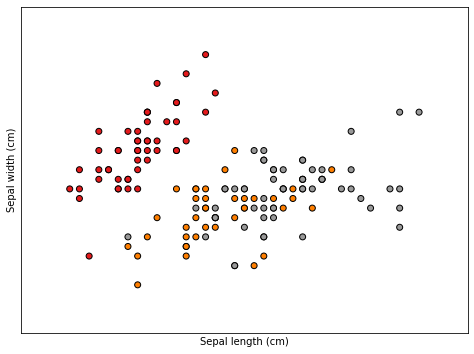

In [60]:
#We only take the first two features ( caractéristiques)
X = iris_dataset.data [:, :2]
y = iris_dataset.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure (2, figsize= (8,6))
plt.clf ()

plt.scatter (X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

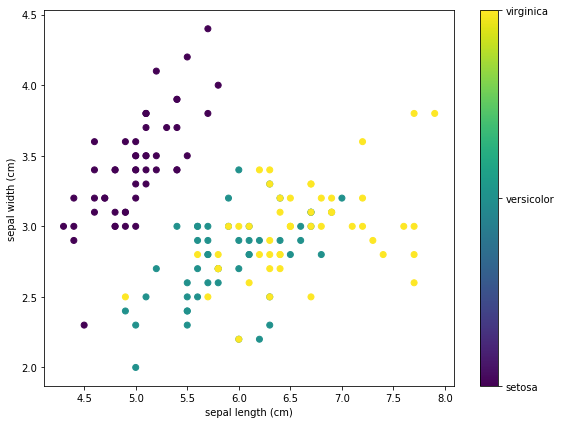

In [61]:
# Load the data
#from sklearn.datasets import load_iris
#iris_dataset = load_iris()

#from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris_dataset.target_names[int(i)])

plt.figure(figsize=(8, 6))
plt.scatter(iris_dataset.data[:, x_index], iris_dataset.data[:, y_index], c=iris_dataset.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris_dataset.feature_names[x_index])
plt.ylabel(iris_dataset.feature_names[y_index])

plt.tight_layout()
plt.show()

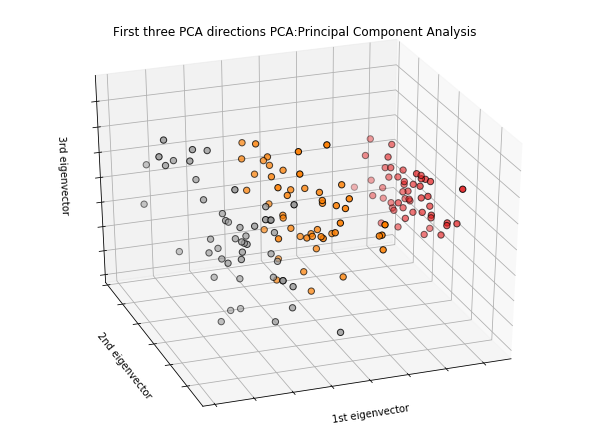

In [62]:
#To getter a better understanding of interaction of the dimensions
#plot the first three PCA dimensions (PCA: Principal Component Analysis)

fig = plt.figure(1, figsize=(8,6))
#fig = plt.figure(figsize=plt.figaspect(2.))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris_dataset.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions PCA:Principal Component Analysis")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
#https://math.mit.edu/~gs/linearalgebra/ila0601.pdf

### Train Test Split


"random_state" est utilisé pour assurer que nous obtiendrons le même résultat si nous exécutons plusieurs fois la même fonction au générateur de nombres pseudo-aléatoires "train_test_split". "random_state", rend la sortie produite totalement déterministe.

La sortie produite par la fonction train_test_split est un ensemble de tableaux NumPy:
    
X_train, X_test, y_train et y_test.
X_train: contient 75% des lignes du jeu de données, et
X_test: contient les 25% qui restent.
    

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (iris_dataset['data'], iris_dataset['target'], random_state=0)


In [64]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [65]:
print ("X_test shape: {}". format(X_test.shape))
print ("y_test shape: {}". format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


### Check the data

To detect abnormal elements, for example that some iris were measured in inches and not in centimeters. One way to do this is to use the scatter plot (nuage de points ou diagramme de dispersion).
To create this graph, we convertr the NumPy table on DataFrame pandas. then we use "scatter_matrix" where the diagonal of the matrix have histograms of each characteristics.

Andreas Muller "Le Machine learning avec Python"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7B5378988>,
      dtype=object)

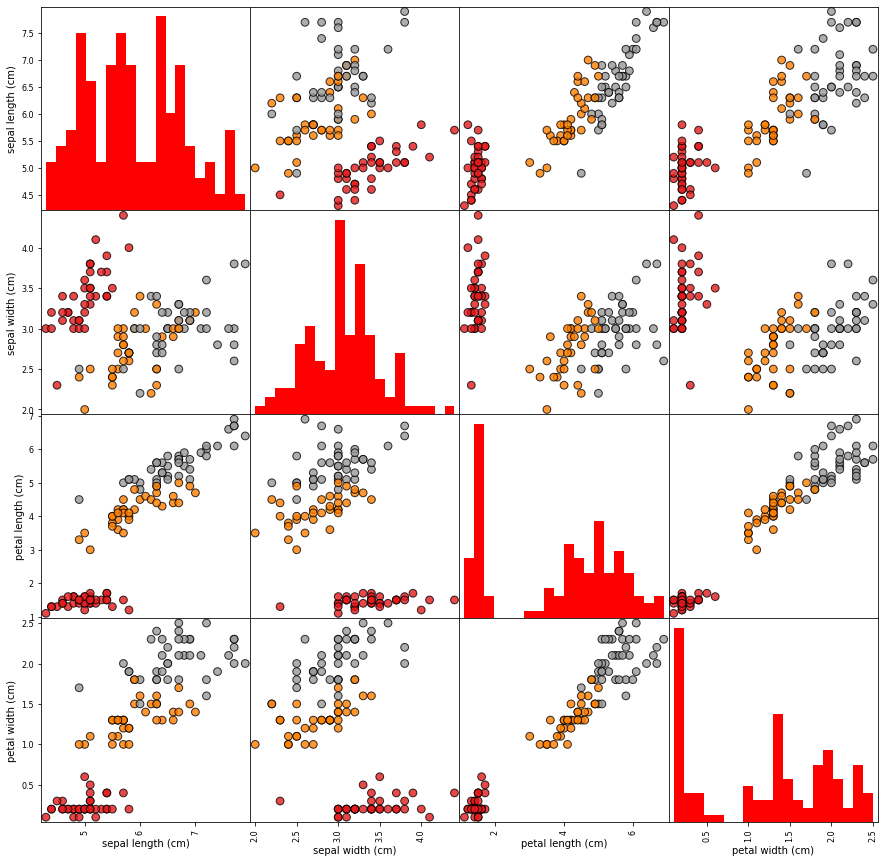

In [66]:
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap




iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',hist_kwds={'color':['r'],'bins':20} ,  cmap=plt.cm.Set1 ,edgecolor='k', s=60,
                          alpha=.8)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         


https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

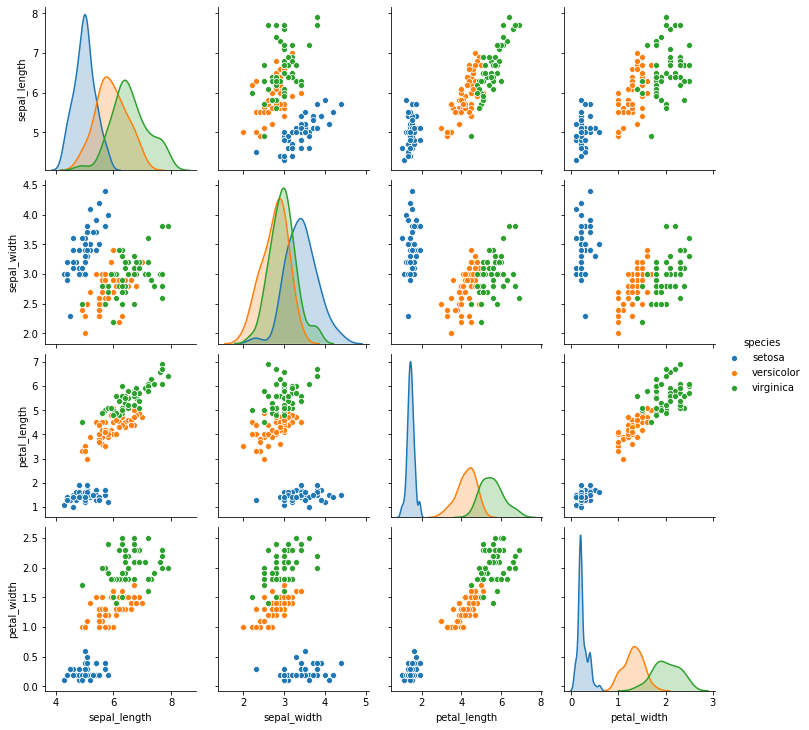

In [72]:
import seaborn as sns
iris=sns.load_dataset("iris")


sns.pairplot(iris, hue='species', height=2.5);



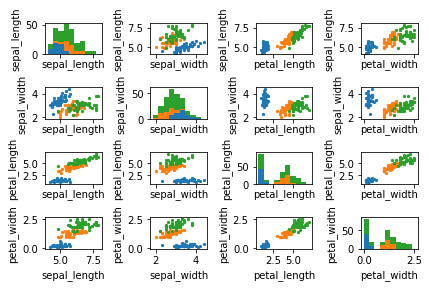

In [74]:
import seaborn as sns
#iris_df=sns.load_dataset("iris")

n_hist = 10
category = "species"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
mi = iris[columns].values.min()
ma = iris[columns].values.max()
hist_bins = np.linspace (mi, ma, n_hist)

fig, axes = plt.subplots(nrows=len(columns), ncols=len(columns), sharex='col')

for i, row in enumerate (columns):
    for j, col in enumerate(columns):
        ax=axes[i,j]
        if i == j:
            #diagonal
            mi=iris[col].values.min()
            ma=iris[col].values.max()
            hist_bins=np.linspace(mi, ma, n_hist)
            def hist(x):
                h, e = np.histogram(x.dropna()[col], bins=hist_bins)
                return pd.Series (h, e[:-1])
            b= iris[[col,category]].groupby(category).apply(hist).T
            values = np.cumsum(b.values, axis=1)
            for k in range(len(b.columns)):
                if k == 0:
                    ax.bar(b.index, values[:,k], width=np.diff(hist_bins)[0])
                else:
                    ax.bar(b.index, values[:,k], width=np.diff(hist_bins)[0],
                           bottom=values[:,k-1])
        else:
            # offdiagonal
            for (n,cat) in iris.groupby(category):
                ax.scatter(cat[col],cat[row], s = 5,label=n, )
        ax.set_xlabel(col)
        ax.set_ylabel(row)
        #ax.legend()
plt.tight_layout()
plt.show()



In [70]:
iris_dataframe.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2
111,4.6,3.2,1.4,0.2


In [26]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


In [33]:
iris_dataframe.loc[1:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
5,5.0,3.5,1.6,0.6
6,5.4,3.7,1.5,0.2
7,5.0,2.0,3.5,1.0
8,6.5,3.0,5.5,1.8
9,6.7,3.3,5.7,2.5
10,6.0,2.2,5.0,1.5


### KNN K-nearest neighbors model 

Les k plus proches voisins.
X_train: contient les données d'apprentissge
y_train: contient les étiquettes

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier (n_neighbors=1)


In [76]:
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Predictions

Connaitre l'espèce à la qu'appartient une nouvelle fleur: 

    * sepale: 5cm de long et 2.9cm de large
    * pétale: 1cm long et 0.2 cm de lageur

In [78]:
#les donnes de la nouvelle fleur on peut la placer sur un tableau Numpy 
#à deux dimensions.

X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [79]:
#Pour effectuer la prediction on appele la méthode predict de l'objet knn

prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


### Model evaluation

In [80]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [81]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [82]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
